In [1]:
from robobrowser import RoboBrowser
from bs4 import BeautifulSoup
from time import sleep
import re
import pandas as pd
import numpy as np

import seaborn as sns
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
browser = RoboBrowser(history=True)
data = pd.read_csv('wiki.csv')
data = pd.DataFrame()

In [5]:
browser.open('https://simple.wikipedia.org/wiki/Special:Random')

browser.find('p').text

C:\Users\Vince\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Vince\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


"Glenn Edward McDuffie (May 31, 1927 – March 9, 2014) was an American retired World War II soldier. He was known for being the subject of Alfred Eisenstaedt's photograph V-J Day in Times Square.[1] He was kissing nurse Edith Shain because World War II ended."

In [8]:
# SImple version

alltext = []
for i in range(10):
    browser.open('https://simple.wikipedia.org/wiki/Special:Random')
    url = browser.url
    simple = browser.find('p').text
    simple = simple.strip()
    simple = re.sub(r'\[\d+\]', "", simple)
    simple = re.sub(r'\[\D+\]', "", simple)
    simple = simple.replace('[citation needed]', '')
    if len(simple) > 100:
        #print(text, '\n')
    
        for link in browser.find_all('a'):
            if link.text == 'English':
                try:
                    browser.open(link.get('href'))
                    english = browser.find('p').text

                    english = english.strip()
                    english = re.sub(r'\[\d+\]', "", english)
                    english = re.sub(r'\[\D+\]', "", english)
                    english = english.replace('[citation needed]', '')
                    #print(english, '\n')
                    entry = [url, simple, english]
                    alltext.append(entry)
                    data = data.append(alltext, ignore_index=True)
                    data = data.drop_duplicates(subset=0)
                except:
                    continue
    if i % 100 == 0:
        data.to_csv('wiki2.csv')
        print(i)

C:\Users\Vince\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Vince\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


0


In [60]:
alltext = []
for i in range(2000):
    browser.open('https://simple.wikipedia.org/wiki/Special:Random')
    url = browser.url
    text = ''
    simple = ''
    english = ''
    for p in browser.find_all('p'):
        text += p.get_text() + ' '
    text = text.strip()
    text = re.sub(r'\[\d+\]', "", text)
    text = re.sub(r'\[\D+\]', "", text)
    text = text.replace('[citation needed]', '')
    if len(text) > 400:
        #print(text, '\n')
    
        for link in browser.find_all('a'):
            if link.text == 'English':
                try:
                    browser.open(link.get('href'))
                    simple = text
                    text = ''
                    for p in browser.find_all('p'):
                        text += p.get_text() + ' '
                    text = text.strip()
                    text = re.sub(r'\[\d+\]', "", text)
                    text = re.sub(r'\[\D+\]', "", text)
                    text = text.replace('[citation needed]', '')
                    english = text
                    #print(english, '\n')
                    entry = [url, simple, english]
                    alltext.append(entry)
                    data = data.append(alltext, ignore_index=True)
                    data = data.drop_duplicates(subset=0)
                except:
                    continue
    if i % 100 == 0:
        data.to_csv('wiki2.csv')
        print(i)

C:\Users\Vince\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Vince\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


0


C:\Users\Vince\Anaconda3\lib\site-packages\pandas\core\frame.py:5186: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  other = other.loc[:, self.columns]
C:\Users\Vince\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [10]:
data[1] = data[1].str.replace('\n', ' ')
data[2] = data[2].str.replace('\n', ' ')
# data.to_csv('wiki.csv')

In [8]:
data['1'] = data['1'].str.replace('\n', ' ')
data['2'] = data['2'].str.replace('\n', ' ')
# data.to_csv('wiki.csv')

In [65]:
del data['seq_simple']
del data['seq_english']

In [3]:
data = data.sample(50)

data

,Unnamed: 0,0,1,2,seq_simple,seq_english
1984,1984,https://simple.wikipedia.org/wiki/Ramallah,"16,344 dunams (16.3 km²) Ramallah (Arabic: را...",Ramallah (Arabic: رام الله‎ Rāmallāh) is a Pa...,"[481, 27780, 88778, 481, 62189, 4626, 1882, 66...","[4626, 1882, 66762, 156916, 156917, 8, 6, 3136..."
1865,1865,https://simple.wikipedia.org/wiki/Batman:_Rise...,Batman: Rise of Sin Tzu is an action-adventure...,Batman: Rise of Sin Tzu is a 2003 beat 'em up ...,"[3108, 1522, 2, 7610, 21837, 8, 21, 662, 3246,...","[3108, 1522, 2, 7610, 21837, 8, 6, 620, 2798, ..."
1949,1949,https://simple.wikipedia.org/wiki/The_Jungle,The Jungle is a 1906 novel written by journali...,The Jungle is a 1906 novel written by the Amer...,"[1, 7411, 8, 6, 4923, 982, 360, 14, 2902, 2004...","[1, 7411, 8, 6, 4923, 982, 360, 14, 1, 110, 29..."
1047,1047,https://simple.wikipedia.org/wiki/Estelle_Yancey,"Estelle ""Mama"" Yancey (January 1, 1896–April 1...","Estelle ""Mama"" Yancey (January 1, 1896 – April...","[21719, 11597, 14616, 209, 64, 86580, 576, 149...","[21719, 11597, 14616, 209, 64, 6202, 189, 236,..."
1380,1380,https://simple.wikipedia.org/wiki/Cosmetics,"Cosmetics (also called makeup, make up, or mak...",Cosmetics are substances or products used to e...,"[6363, 27, 87, 5201, 219, 72, 23, 219, 72, 20,...","[6363, 20, 4970, 23, 1228, 55, 5, 8340, 23, 45..."
589,589,https://simple.wikipedia.org/wiki/Constitution,The constitution of a country (or a state) is ...,A constitution is a set of fundamental princip...,"[1, 780, 2, 6, 234, 23, 6, 76, 8, 6, 430, 497,...","[6, 780, 8, 6, 207, 2, 3055, 3067, 23, 399, 27..."
1248,1248,https://simple.wikipedia.org/wiki/Roger_Christian,"Roger Christian (born February 25, 1944) is an...",Roger Christian (born 25 February 1944) is an ...,"[3046, 693, 194, 270, 437, 1926, 8, 21, 252, 2...","[3046, 693, 194, 437, 270, 1926, 8, 21, 252, 2..."
411,411,https://simple.wikipedia.org/wiki/Armide,Armide is an opera. The music was written by J...,Armide is an opera by Jean-Baptiste Lully. The...,"[14995, 8, 21, 1502, 1, 121, 7, 360, 14, 2123,...","[14995, 8, 21, 1502, 14, 2123, 14213, 8165, 1,..."
1603,1603,https://simple.wikipedia.org/wiki/Bruce_McGill,"Bruce Travis McGill (born July 11, 1950) is an...","Bruce Travis McGill (born July 11, 1950) is an...","[4044, 18398, 10135, 194, 226, 383, 1619, 8, 2...","[4044, 18398, 10135, 194, 226, 383, 1619, 8, 2..."
252,252,https://simple.wikipedia.org/wiki/Annabeth_Chase,"Percy Jackson & the Olympians, Annabeth Chase ...",This is a list of characters that appear in th...,"[4447, 1184, 1, 18844, 5806, 5568, 8, 6, 3932,...","[26, 8, 6, 684, 2, 664, 12, 941, 4, 1, 1892, 4..."


In [63]:
#PROCESS RAW TEXT
from keras.preprocessing.text import Tokenizer

print("Text to seq process...")
raw_text = np.hstack([data[1].str.lower(), data[2].str.lower()])

print("Fitting tokenizer...")
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(raw_text)

print("Transforming text to seq...")
data["seq_simple"] = tokenizer.texts_to_sequences(data[1].str.lower())
data["seq_english"] = tokenizer.texts_to_sequences(data[2].str.lower())

data.head(3)

Text to seq process...
Fitting tokenizer...
Transforming text to seq...


,0,1,2,seq_simple,seq_english
0,https://simple.wikipedia.org/wiki/Predator_(mo...,Predator is a 1987 American science fiction ho...,Predator is a 1987 American science fiction ac...,"[17, 7, 4, 13, 2, 3, 8, 7, 1, 5, 9, 1, 2, 1, 2...","[17, 7, 4, 13, 2, 3, 8, 7, 1, 5, 9, 1, 2, 1, 2..."
1,https://simple.wikipedia.org/wiki/Diana%27s_Peak,Diana's Peak is the highest point on the islan...,"Diana's Peak is the highest point, at 818 metr...","[13, 5, 2, 6, 2, 42, 9, 1, 17, 4, 2, 24, 1, 5,...","[13, 5, 2, 6, 2, 42, 9, 1, 17, 4, 2, 24, 1, 5,..."
2,https://simple.wikipedia.org/wiki/Lucknow,Lucknow is the capital city of the north India...,Lucknow (/ˈlʌknaʊ/ ( listen) Lakhna'ū) is the ...,"[12, 14, 11, 24, 6, 8, 21, 1, 5, 9, 1, 3, 10, ...","[12, 14, 11, 24, 6, 8, 21, 1, 32, 44, 50, 12, ..."


In [64]:
#SEQUENCES VARIABLES ANALYSIS
simple_len = data['seq_simple'].apply(len)
english_len = data['seq_english'].apply(len)

print("max simple article:", simple_len.max())

print("max english article", english_len.max())

max simple article: 555
max english article 647


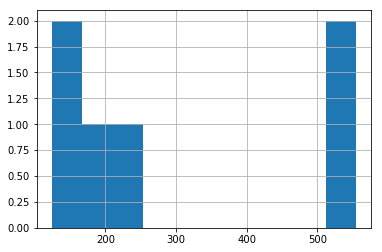

In [65]:
simple_len.hist()

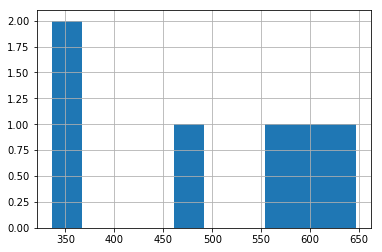

In [66]:
english_len.hist()

In [67]:
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(data[2])

sim_tokenizer = Tokenizer()
sim_tokenizer.fit_on_texts(data[1])

In [68]:
input_characters = sorted(eng_tokenizer.word_index.keys())
target_characters = sorted(sim_tokenizer.word_index.keys())
num_encoder_tokens = len(eng_tokenizer.word_index)
num_decoder_tokens = len(sim_tokenizer.word_index)
max_encoder_seq_length = simple_len.max()
max_decoder_seq_length = english_len.max()

print('Number of samples:', len(data))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 6
Number of unique input tokens: 282
Number of unique output tokens: 181
Max sequence length for inputs: 555
Max sequence length for outputs: 647


In [69]:
# Create a char-index & index-char dict

input_texts = data[2]
target_texts = data[1]

input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

# Prepare for one-hot encoding
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [44]:
input_token_index['.'] = len(input_token_index)
target_token_index['.'] = len(target_token_index)

In [80]:
input

<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x00000137D59973C8>>

In [74]:
# Iterate over input and target texts and number them
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    # One-hot encode input text
    for t, char in enumerate(input_text):
        print(char, ' ')
#         encoder_input_data[i, t, input_token_index[char]] = 1.

P  
r  
e  
d  
a  
t  
o  
r  
   
i  
s  
   
a  
   
1  
9  
8  
7  
   
A  
m  
e  
r  
i  
c  
a  
n  
   
s  
c  
i  
e  
n  
c  
e  
   
f  
i  
c  
t  
i  
o  
n  
   
a  
c  
t  
i  
o  
n  
   
f  
i  
l  
m  
   
d  
i  
r  
e  
c  
t  
e  
d  
   
b  
y  
   
J  
o  
h  
n  
   
M  
c  
T  
i  
e  
r  
n  
a  
n  
.  
   
I  
t  
   
s  
t  
a  
r  
s  
   
A  
r  
n  
o  
l  
d  
   
S  
c  
h  
w  
a  
r  
z  
e  
n  
e  
g  
g  
e  
r  
   
a  
s  
   
t  
h  
e  
   
l  
e  
a  
d  
e  
r  
   
o  
f  
   
a  
n  
   
e  
l  
i  
t  
e  
   
s  
p  
e  
c  
i  
a  
l  
   
f  
o  
r  
c  
e  
s  
   
t  
e  
a  
m  
   
w  
h  
i  
c  
h  
   
i  
s  
   
o  
n  
   
a  
   
m  
i  
s  
s  
i  
o  
n  
   
t  
o  
   
r  
e  
s  
c  
u  
e  
   
h  
o  
s  
t  
a  
g  
e  
s  
   
f  
r  
o  
m  
   
g  
u  
e  
r  
r  
i  
l  
l  
a  
   
h  
e  
l  
d  
   
t  
e  
r  
r  
i  
t  
o  
r  
y  
   
i  
n  
   
V  
a  
l  
   
V  
e  
r  
d  
e  
   
i  
n  
   
C  
e  


In [72]:
# Iterate over input and target texts and number them
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    
    # One-hot encode input text
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
        
    # One-hot encode output text (same as above)
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char.lower()]] = 1.
        
        # One-hot encode target text
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

SyntaxError: can't assign to function call (<ipython-input-72-ee7d9b42d0fa>, line 5)

In [11]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

latent_dim = 256

# Set up the decoder, using `encoder_states` as initial state.

# Again, wide enough to accept our tokens
decoder_inputs = Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)

# Notice that for the encoder, we didn't use the outputs.
# But the the decoder, that's ALL we use.
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

NameError: name 'encoder_states' is not defined